In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from wordcloud import WordCloud, STOPWORDS 

# Question 1

In [2]:
df = pd.read_csv("parler_postsData.csv")  
dict_frequency={}
count_total=0
for i in df['Creator']:
  if(i in dict_frequency.keys()):
    temp=dict_frequency.get(i)
    dict_frequency[i]=temp+1
  else:
    dict_frequency[i]=1
  count_total+=1

#sorting done according to dictionary values
sorted_tuples_frequency = sorted(dict_frequency.items(), key=lambda item: item[1],reverse=True)
sorted_dict_frequency = {k: v for k, v in sorted_tuples_frequency}#dictionary with id and frequency sorted in decreasing order according to frequecy


#Correct df for user data
df_user=pd.read_csv("parler_userData.csv")  
df_user_data=df_user[['Id','Username','Human','Verified','Interactions','Score','Bio']]

List making for top 10 and checking their human and verified condition

In [3]:
#making list of top 10
id_frequency_top10=np.array(list(sorted_dict_frequency.keys())[0:10]) #contains id of top 10
frequency_top10=np.array(list(sorted_dict_frequency.values())[0:10]) #contains frequency of top 10

#for finding percentage
frequency_top10=(frequency_top10/count_total)
frequency_top10=frequency_top10*100

#making a Username,Verified,Human list
Username_list_frequency=[]
Verified_list_frequency=[]
Human_list_frequency=[]

for i in range(10):
  t=df_user_data[df_user_data['Id']==id_frequency_top10[i]]
  Username_list_frequency.extend(t['Username'])
  Verified_list_frequency.extend(t['Verified'])
  Human_list_frequency.extend(t['Human'])

print(sum(frequency_top10)," total content generated by top 10 cumulatively")
frequency_top10=frequency_top10.astype(str).astype(float).tolist()

16.60601304625043  total content generated by top 10 cumulatively


Plotting Question 1

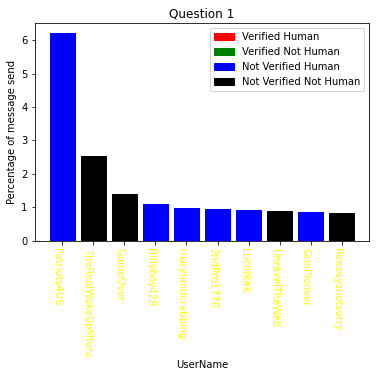

In [4]:
graph=plt.bar(Username_list_frequency,frequency_top10) 
plt.xticks(color='yellow', rotation=270, horizontalalignment='right')
#red(Verified Human)  green(Verified not human)   blue(not verified Human)  black(not verified not human)

handles= [plt.Rectangle((0,0),1,1, color=x) for x in ['red','green','blue','black']]
labels=['Verified Human','Verified Not Human','Not Verified Human','Not Verified Not Human']
for i in range(10):
  if (Verified_list_frequency[i]==True and Human_list_frequency[i]==True):
    graph[i].set_color('red')
  elif (Verified_list_frequency[i]==True):
    graph[i].set_color('green')
  elif (Human_list_frequency[i]==True):
    graph[i].set_color('blue')
  else:
    graph[i].set_color('black')

plt.title('Question 1')
plt.xlabel('UserName')
plt.ylabel('Percentage of message send')
plt.legend(handles,labels)


# **Question 2 begins**

# Upvotes and Interactions

In [5]:
#dictionary will contains id as keys and interactions and upvotes as values respectively
dict_interactions={}
dict_upvotes={}

for i in range(df_user_data.shape[0]):
  temp_id=df_user_data.iloc[i,0]
  temp_interactions=df_user_data.iloc[i,4]
  temp_upvotes=df_user_data.iloc[i,5]
  dict_upvotes[temp_id]=temp_upvotes
  dict_interactions[temp_id]=temp_interactions

#sorting done according to values for dictionary
sorted_tuples_upvotes = sorted(dict_upvotes.items(), key=lambda item: item[1],reverse=True)
sorted_dict_upvotes = {k: v for k, v in sorted_tuples_upvotes}#dictionary with id and upvotes sorted in decreasing order according to frequecy

sorted_tuples_interactions = sorted(dict_interactions.items(), key=lambda item: item[1],reverse=True)
sorted_dict_interactions = {k: v for k, v in sorted_tuples_interactions}#dictionary with id and interactions sorted in decreasing order according to frequecy


#making list for top 10 with id as keys and upvotes and interactions as values respectively
id_upvotes_top10=np.array(list(sorted_dict_upvotes.keys())[0:10]) #contains id of top 10
upvotes_top10=np.array(list(sorted_dict_upvotes.values())[0:10]) #contains upvotes of top 10

id_interactions_top10=np.array(list(sorted_dict_interactions.keys())[0:10]) #contains id of top 10
interactions_top10=np.array(list(sorted_dict_interactions.values())[0:10]) #contains interactions of top 10


Username_list_upvotes=[]
Verified_list_upvotes=[]
Human_list_upvotes=[]

Username_list_interactions=[]
Verified_list_interactions=[]
Human_list_interactions=[]

word_cloud_bio=[] #this will contain bio of top 10 users according to interactions

#Addition to Username done by looking at id plus the addition to verified and human list done throught users dataset
for i in range(10):
  t=df_user_data[df_user_data['Id']==id_upvotes_top10[i]]
  Username_list_upvotes.extend(t['Username'])
  Verified_list_upvotes.extend(t['Verified'])
  Human_list_upvotes.extend(t['Human'])  

  t1=df_user_data[df_user_data['Id']==id_interactions_top10[i]]
  Username_list_interactions.extend(t1['Username'])
  Verified_list_interactions.extend(t1['Verified'])
  Human_list_interactions.extend(t1['Human'])
  word_cloud_bio.extend(t1['Bio'])

for i in range(10):
  print(Username_list_interactions[i]," ",interactions_top10[i])

upvotes_top10=upvotes_top10.astype(str).astype(float).tolist()
interactions_top10=interactions_top10.astype(str).astype(float).tolist()

Marklevinshow   8478
AmyPeikoff   6503
parler   6407
parlerdev   6403
oathkeep3r   6275
Jared   6247
OmegaGeek   4131
Jeffreywernick   2307
John   2151
FATTENTHEVERVE   1410


Graph Plotting - Upvotes

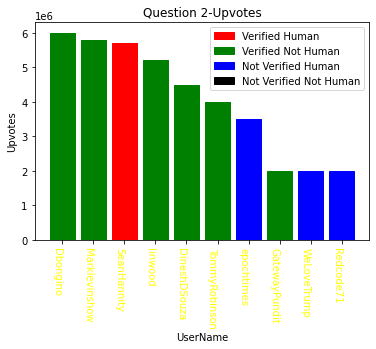

In [6]:
graph=plt.bar(Username_list_upvotes,upvotes_top10) 
plt.xticks(color='yellow', rotation=270, horizontalalignment='right')
#red(Verified Human)  green(Verified not human)   blue(not verified Human)  black(not verified not human)

handles= [plt.Rectangle((0,0),1,1, color=x) for x in ['red','green','blue','black']]
labels=['Verified Human','Verified Not Human','Not Verified Human','Not Verified Not Human']
for i in range(10):
  if (Verified_list_upvotes[i]==True and Human_list_upvotes[i]==True):
    graph[i].set_color('red')
  elif (Verified_list_upvotes[i]==True):
    graph[i].set_color('green')
  elif (Human_list_upvotes[i]==True):
    graph[i].set_color('blue')
  else:
    graph[i].set_color('black')

plt.title('Question 2-Upvotes')
plt.xlabel('UserName')
plt.ylabel('Upvotes')
plt.legend(handles,labels)

Graph Plotting -  Interactions 

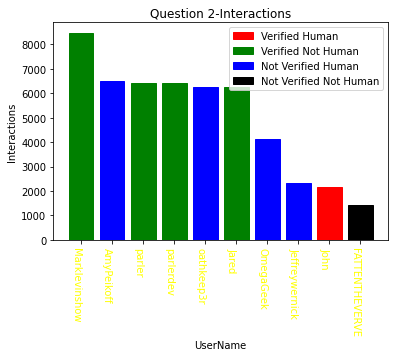

In [7]:
graph=plt.bar(Username_list_interactions,interactions_top10) 
plt.xticks(color='yellow', rotation=270, horizontalalignment='right')
#red(Verified Human)  green(Verified not human)   blue(not verified Human)  black(not verified not human)

handles= [plt.Rectangle((0,0),1,1, color=x) for x in ['red','green','blue','black']]
labels=['Verified Human','Verified Not Human','Not Verified Human','Not Verified Not Human']
for i in range(10):
  if (Verified_list_interactions[i]==True and Human_list_interactions[i]==True):
    graph[i].set_color('red')
  elif (Verified_list_interactions[i]==True):
    graph[i].set_color('green')
  elif (Human_list_interactions[i]==True):
    graph[i].set_color('blue')
  else:
    graph[i].set_color('black')

plt.title('Question 2-Interactions')
plt.xlabel('UserName')
plt.ylabel('Interactions')
plt.legend(handles,labels)

# Mentions

In [8]:
dict_mentions={} #dictionary contains id as keys and no of mentions as values

for i in df['At']:
  i=i[1:-1]
  if(i==""):
    continue
  temp_list_mentions=i.split(", ")
  for j in range(len(temp_list_mentions)):
    temp_id=temp_list_mentions[j].split(": ") #this is done since username is given as key and userId given as value
    if (temp_id[1] in dict_mentions.keys()):  #I am considering only userIds and adding to dictionary then doing the count on how many times that id occured
      temp=dict_mentions.get(temp_id[1])
      dict_mentions[temp_id[1]]=temp+1
    else:
      dict_mentions[temp_id[1]]=1

#sorting done for dictionary
sorted_tuples_mentions = sorted(dict_mentions.items(), key=lambda item: item[1],reverse=True)
sorted_dict_mentions = {k: v for k, v in sorted_tuples_mentions}#dictionary with id and mentions sorted in decreasing order according to frequecy

id_mentions_top10=np.array(list(sorted_dict_mentions.keys())[0:10]) #contains id of top 10
mentions_top10=np.array(list(sorted_dict_mentions.values())[0:10]) #contains mentions of top 10


Username_list_mentions=[]
Verified_list_mentions=[]
Human_list_mentions=[]


for i in range(10):
  t=df_user_data[df_user_data['Id']==id_mentions_top10[i][1:-1]]
  Username_list_mentions.extend(t['Username'])
  Verified_list_mentions.extend(t['Verified'])
  Human_list_mentions.extend(t['Human'])

#mentions_top10=upvotes_top10.astype(str).astype(float).tolist()

Graph Plotting - Mentions

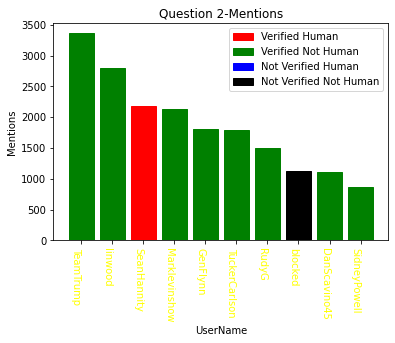

In [9]:
graph=plt.bar(Username_list_mentions,mentions_top10) 
plt.xticks(color='yellow', rotation=270, horizontalalignment='right')
#red(Verified Human)  green(Verified not human)   blue(not verified Human)  black(not verified not human)

handles= [plt.Rectangle((0,0),1,1, color=x) for x in ['red','green','blue','black']]
labels=['Verified Human','Verified Not Human','Not Verified Human','Not Verified Not Human']
for i in range(10):
  if (Verified_list_mentions[i]==True and Human_list_mentions[i]==True):
    graph[i].set_color('red')
  elif (Verified_list_mentions[i]==True):
    graph[i].set_color('green')
  elif (Human_list_mentions[i]==True):
    graph[i].set_color('blue')
  else:
    graph[i].set_color('black')

plt.title('Question 2-Mentions')
plt.xlabel('UserName')
plt.ylabel('Mentions')
plt.legend(handles,labels)

# Q2 B

In [10]:
#data cleaning done to remove nan=no bio, websites,mentions,urls,short word of length=2 and hashtags
#written .org,.com specifically according to given dataset accroding to which the data preprocessing is done
def data_cleaning(temp_str):
  if(len(temp_str)<3 or temp_str[0:]=="nan" or temp_str[0]=='#' or temp_str[0]=='@' ):
    return 0
  if(len(temp_str)>4 and ( "http" in temp_str or ".com" in temp_str or ".org" in temp_str)):
    return 0
  return 1

In [11]:
comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in word_cloud_bio: 
    # typecaste each val to string 
    val = str(val) 
    val=val.replace("\\n"," ")
    val=val.replace("\\n\n"," ")
    # split the value 
    tokens_temp = val.split() 
    tokens=[]
    # Converts each token into lowercase 
    for i in range(len(tokens_temp)): 
        tokens_temp[i] = tokens_temp[i].lower() 
        t=data_cleaning(tokens_temp[i])
        if(t==1):
          tokens.append(tokens_temp[i])
    comment_words += " ".join(tokens)+" "
# print(comment_words)


Word-Cloud (For top 10 user bios according to most no of interactions)

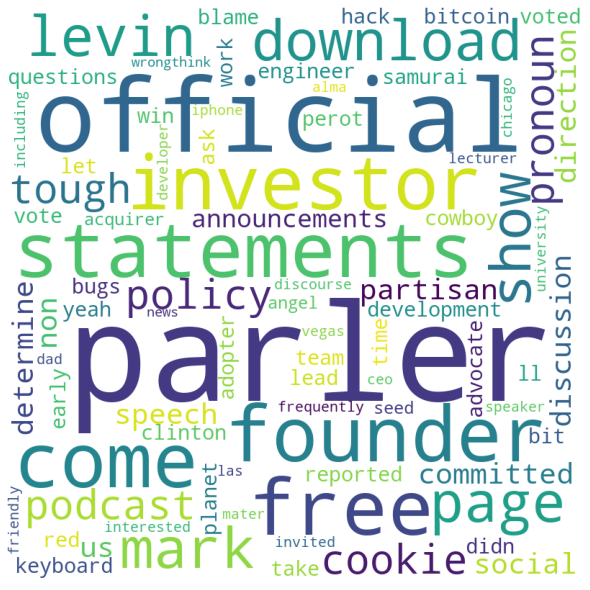

In [12]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Q3

So basically first I added every posts body to "word_cloud_body" as strings. Now loop over it. Then replaced "\n" and "\n\n" to " ". Then split the whole string and started looping over that string word by word.
Then calling the data cleaning function which will tell whether to include that word for word cloud or not. If returned 1 then include it else exclude.
If included then words are added to "tokens" which are joined to "comment_words". Also for the next part of the question a dictionary is made which stores the word and its frequency in dict_word_count

In [13]:
word_cloud_body=[]
count=0
for i in df["Body"]:
  word_cloud_body.append(i)

comment_words = '' 
stopwords = set(STOPWORDS) 

dict_word_count={}

# iterate through the csv file 
for val in word_cloud_body: 
    # typecaste each val to string 
    val = str(val) 
    val=val.replace("\\n"," ")
    val=val.replace("\\n\n"," ")
    # split the value 
    tokens_temp = val.split() 
    tokens=[]
   
    for i in range(len(tokens_temp)): 
        tokens_temp[i] = tokens_temp[i].lower()
        tokens_temp[i] = tokens_temp[i].replace("now"," ")
        tokens_temp[i] = tokens_temp[i].replace("will"," ") #will could be name or future tense that why removed it because of non clearity
        t=data_cleaning(tokens_temp[i])
        if(t==1):
          if (tokens_temp[i] in dict_word_count.keys()):
            temp_count=dict_word_count.get(tokens_temp[i])
            dict_word_count[tokens_temp[i]]=temp_count+1
          else:
            dict_word_count[tokens_temp[i]]=1
          tokens.append(tokens_temp[i])
      
    comment_words += " ".join(tokens)+" "

Word Cloud (For post Body)

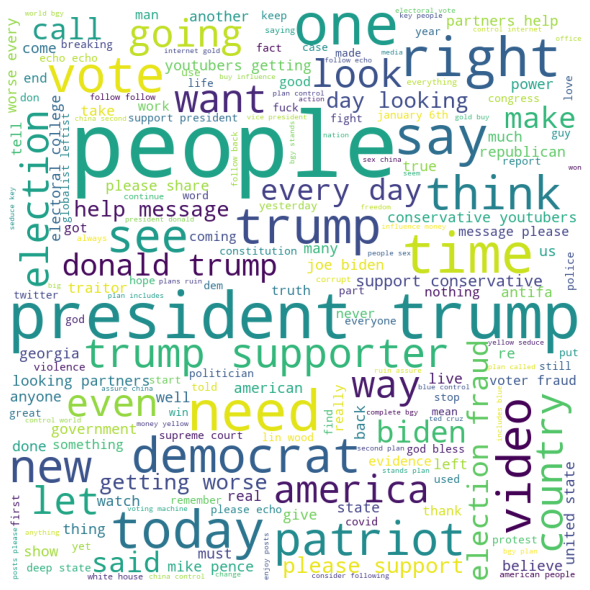

In [14]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [15]:
final_dict = {key: dict_word_count[key] for key in dict_word_count if key not in stopwords}
from heapq import nlargest 
high = nlargest(10, final_dict, key = final_dict.get)
words_q3=[]
words_occurence_q3=[]
for val in high: 
    words_q3.append(val)
    words_occurence_q3.append(final_dict.get(val))

for i in range(10):
  print(words_q3[i]," ",words_occurence_q3[i])

trump   10068
election   5934
president   5806
people   5294
please   3937
one   3267
support   2964
fraud   2949
echo   2892
follow   2868


Graph Plotting (top 10 words based on occurence) 

Text(0, 0.5, 'Occurences')

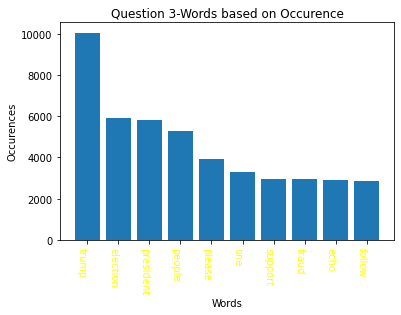

In [16]:
graph=plt.bar(words_q3,words_occurence_q3) 
plt.xticks(color='yellow', rotation=270, horizontalalignment='right')

plt.title('Question 3-Words based on Occurence')
plt.xlabel('Words')
plt.ylabel('Occurences')


# Q3 b - no of occurences

In [17]:
hashtags=[]
for i in df["Body"]:
  hashtags.append(i)

hashtags_count={}
hashtags_length={}
for val in hashtags:
  val = str(val) 
  val=val.replace("\\n"," ")
  val=val.replace("\\n\n"," ")
    # split the value 
  tokens_temp = val.split() 
  for i in range(len(tokens_temp)): 
    if(len(tokens_temp[i])>1):
      if(tokens_temp[i][0]=='#'):
        if (tokens_temp[i] in hashtags_count.keys()):
            temp_count=hashtags_count.get(tokens_temp[i])
            hashtags_count[tokens_temp[i]]=temp_count+1

            temp_length=hashtags_length.get(tokens_temp[i])
            hashtags_length[tokens_temp[i]]=temp_length+len(tokens_temp)
        else:
            hashtags_count[tokens_temp[i]]=1
            hashtags_length[tokens_temp[i]]=len(tokens_temp)

sorted_tuples_hashtags = sorted(hashtags_count.items(), key=lambda item: item[1],reverse=True)
sorted_dict_hashtags = {k: v for k, v in sorted_tuples_hashtags}#dictionary with id and mentions sorted in decreasing order according to frequecy

hashtags_top10=np.array(list(sorted_dict_hashtags.keys())[0:10]) #contains id of top 10
hashtags_count_top10=np.array(list(sorted_dict_hashtags.values())[0:10]) #contains mentions of top 10

Graph-Plotting (Occurence of hashtags)

Text(0, 0.5, 'Occurences')

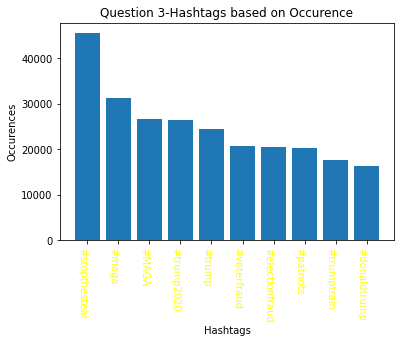

In [18]:
graph=plt.bar(hashtags_top10,hashtags_count_top10) 
plt.xticks(color='yellow', rotation=270, horizontalalignment='right')

plt.title('Question 3-Hashtags based on Occurence')
plt.xlabel('Hashtags')
plt.ylabel('Occurences')

# Q3 b - avg post length

In [19]:
hashtags_length_count_ratio={}
for i in hashtags_count:
  temp_count=hashtags_count[i]
  temp_length=hashtags_length[i]
  hashtags_length_count_ratio[i]=temp_length/temp_count

sorted_tuples_hashtags_ratio = sorted(hashtags_length_count_ratio.items(), key=lambda item: item[1],reverse=True)
sorted_dict_hashtags_ratio = {k: v for k, v in sorted_tuples_hashtags_ratio}#dictionary with id and mentions sorted in decreasing order according to frequecy

hashtags_top10=np.array(list(sorted_dict_hashtags_ratio.keys())[0:10]) #contains id of top 10
hashtags_ratio_top10=np.array(list(sorted_dict_hashtags_ratio.values())[0:10]) #contains mentions of top 10

Graph Plotting (Hashtags based on average length of post)

Text(0, 0.5, 'Average Length')

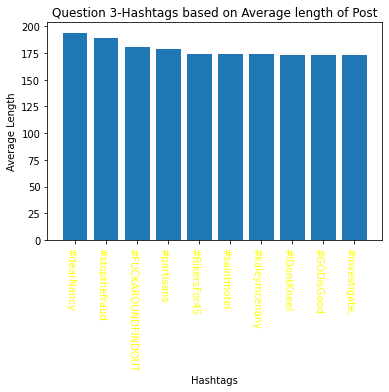

In [20]:
graph=plt.bar(hashtags_top10,hashtags_ratio_top10) 
plt.xticks(color='yellow', rotation=270, horizontalalignment='right')

plt.title('Question 3-Hashtags based on Average length of Post')
plt.xlabel('Hashtags')
plt.ylabel('Average Length')

# Q-4 Begins

Content generation on Parler.

In [21]:
!pip install chart-studio
import chart_studio.plotly as py
import plotly.graph_objs as go
h_dataframe=df.sort_values(by='CreatedAt', ignore_index=True)
time=pd.to_datetime(h_dataframe['CreatedAt'], format='%Y%m%d%H%M%S', errors='coerce')
posts=np.asarray(h_dataframe.index)
posts_df=pd.DataFrame()
posts_df['Date']=time
posts_df['NoOfPosts']=posts
data=[go.Scatter(x=time,y=posts, name='Posts created')]
from plotly.offline import plot
plot(data, filename='Posts.html')

     |████████████████████████████████| 71kB 2.4MB/s 


'Posts.html'

User account creation on Parler.

In [22]:
!pip install chart-studio
import chart_studio.plotly as py
import plotly.graph_objs as go
h_dataframe=df_user.sort_values(by='Joined', ignore_index=True)
time=pd.to_datetime(h_dataframe['Joined'], format='%Y%m%d%H%M%S', errors='coerce')
users=np.asarray(h_dataframe.index)
users_df=pd.DataFrame()
users_df['Date']=time
users_df['NoOfPosts']=users
data=[go.Scatter(x=time,y=users, name='Users account created')]
from plotly.offline import plot
plot(data, filename='Users.html')

'Users.html'